# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results.

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: the GOAT Edward Wang

Nick Geissler <ngeissl2@jh.edu>, Annie Wang <awang105@jh.edu>, Jonathan Ye <jye41@jh.edu>, Evan Zhu <ezhu13@jh.edu>

Link_to_git_repo - https://github.com/JonathanYe3/ML_duh_guyz.git

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Expect to complete #1: Spamicity evaluation": This metric proved less important than others in our opinion (F1 score, overall accuracy, type 2 errors, etc.)
2. "Would like to complete #1: Further malevolent detection": We believe this to be very intensive for marginal improvement. Our algorithm is quite accurate, and implementing some of these algorithms could've been an entire project in its own right.
3. "Would like to complete #2: Personalized deployment data": Some group members were not comfortable disclosing the contents of their emails.
4. "Would like to complete #3: Error analysis": With single words and tokens as features, and no current features in our preprocessing to capture clusters of words or even word orderings, this would be extremely difficult to do. It would addtitionally likely result in AdaBoost being incompatible with the newly preprocessed data.
5. "Would like to complete #4: Removal of typos": We concluded this would in fact be disadvantageous. Many spam and scam emails utilize typos to seem more "believable."


### Completed Deliverables
1. "Must complete #1: Implement AdaBoost": We discuss our dataset pre-processing [in "Dataset" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. "Must complete #2: Evaluation of performance": We discuss training our logistic regression baseline [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
3. "Must complete #3: Basic success benchmark": We discuss our model's basic performance [in "Results" below](#results).
4. "Expect to complete #2: Custom loss function": We discuss our custom loss function that penalizes type 2 errors according to the user's specifications [in "Custom loss function" below](#custom-loss-function). 
5. "Expect to complete #3: Visualization": We visualize and interpret our results [in "Results" below](#results).
6. "Expect to complete #4: Comparative evaluation": We compare our model's results against those of SVM and random forest [in "Results" below](#results).
7. **"Would like to complete #2: Personalized deployment data": We sampled some proprietary emails to see if our model generalizes to real-world situtations in ##idk man maybe we scrape angie email that would be funny otherwise this thing would be uncompleted + The dataset covered all types of emails, from marketing to personal to corporate, and we are rly not that quirky its probably fine**

### Additional Deliverables
1. We ran an extensive grid search [EVAN PLEASE INDICATE THE SECTION HERE].

# Preliminaries

## What problem were you trying to solve or understand?

Q. What are the real-world implications of this data and task?

A. Email communication is one of the most important methods of information transmission in use today. Malevolent spam, phishing, and malware attacks threaten the safety and wellbeing of email users, resulting in monetary damages, security breaches, and privacy violations. Vulnerable populations such as the elderly or non-tech-savvy are particularly susceptible to such scams. Consequently, it is important to be able to accurately classify spam vs "ham" or non-spam email to alert and protect those who need it most. Also, when considering the real life implications of this task, we aim to specifically minimize type 2 errors (spam classified as ham) as it is far more likely for a type 2 error to lead to a scammed individual. We recognize that this results in some legitmate emails being sent to spam/scam, but conclude that this is worth the safety enhancement. Additionally, our implementation in fact introduces a hyperparameter which encodes this penalty, so the implementation in fact would potentially allow users to essentially vary the sensitivity of the algorithm to spam emails.

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

A. Although there hasn't been a coding homework problem directly implementing AdaBoost, we've extensively covered error penalization and AdaBoost in lecture and for the midterm exam. We've also discussed/implemented classification problems like logistic regression, softmax regression, and SVM. During hyperparameter tuning, we also got to see examples of bias and variance tradeoff, as well as overfitting and underfitting, which has been extensively covered in lecture and homework 1.

Q. What makes this problem unique?

A. The scam industry is continually evolving and constantly deploys more advanced scams as technology evolves. Consequentially, to keep up, we need to continue development of novel approaches and review of old techniques at the same pace. Although spam detection is a fairly saturated subject, we wanted to develop an algorithm that prioritizes the real-life implication of type 2 errors. Additionally, AdaBoost doesn't seem to be a very common method currently in use for spam email detection. Perhaps additionally interesting, this problem could not be solved by just applying a pre-existing sklearn model, as there was no existing hyperparameter for a non-uniformly weighted loss function in the existing sklearn AdaBoost.

Q. What ethical implications does this problem have?

A. Scammers unethically trick people into giving away valuable things, whether that is information, money, both, or more. Also, cyber attacks that take advantage of vulnerable populations disproportionately harm those populations. We seek to help find an equitable solution. This problem also does tie somewhat into the ethics of user control. Since our implementation could allow a user to adjust the "type 2 error" penalty, they regain control over what information they see and what is filtered out, which is a particularly requested feature in technology these days.

## Dataset(s)

Q. Describe the dataset(s) you used.

A. Our dataset combines three datasets found on Kaggle. Each datum included a categorized (spam or ham) email, which we were able to break down for further analysis. In total there were 11,976 ham emails and 6,180 spam emails.

Q. How were they collected?

A. We downloaded the raw data from Kaggle.

Q. Why did you choose them?

A.  These data sets were appealing because of their breadth and lent themselves well to our preprocessing framework. They were also free. The emails were clearly labeled and covered a wide range of topics.

Q. How many examples in each?

A. In total, we had 18,156 labeled emails and 56,214 features

In [162]:
# Import guys
import pandas as pd
import numpy as np
from scipy import sparse
# from AdaBoostClassifier import AdaBoostClassifier
#%run AdaBoostWeak.py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter
from wordcloud import WordCloud

## Pre-processing

Please see our preprocessing2 jupyter notebook: {insert link}. 

### Questions

Q. What features did you use or choose not to use? Why?

A. Each feature is a lemma of a word that was present in more than one email. A lemma of a word is specifically the root of a word present in an email (these lemmas were found by lemmatizing the words in the email using a pre-existing NLP model).

Q. If you have categorical labels, were your datasets class-balanced?

A. The dataset was entirely categorical, with labels for lemma features being either 0 if the lemma was contained in a given email and one otherwise. The overall label for each email was either a 1 for spam and a 0 for a legitimate email.

Q. How did you deal with missing data? What about outliers?

A. Missing data and outliers were not really an issue within our dataset. Each email had an associated label as spam or legitimate, with no missing labels. Additionally, it would be difficult and even perhaps erroneous to mark emails, which just consist entirely of sets of words for the purposes of our algorithm, as outliers by some strange metric.

Q. What approach(es) did you use to pre-process your data? Why?

A. We stripped the data of NaNs and punctuation, then broke the emails into arrays of tokenized words, and eliminated pre-classified "stop words" like conjunctions and other words that would not change the sentiment or perceived danger level of a sentence. After this, a lemmatizer from the NLTK package lemmatized the individual words. Then, some more particular things were done to enhance viability of the algorithm. Firstly, all numbers were compressed into one "contains number" feature. Additionally, lemmas were only kept if they appeared in more than one email. Despite this compression, we encountered computational issues owing to the volume of data. We used a sparse matrix to handle the transformation of preprocessed text to a numerical matrix which conserved more memory/storage and allowed for efficient training.

Q. Are your features continuous or categorical? How do you treat these features differently?

A. The features are entirely categorical. Because of this, we need not distinguish between categorical and continuous features or worry about how to handle the differences.

In [3]:
# For those same examples above, what do they look like after being pre-processed?
# column names
with open('data/column_names.txt', 'rb') as f:
    column_names = [line.strip() for line in f] # feature labels

sparse_dat = sparse.load_npz("data/sparse_df.npz")

# Extract labels from the first column
labels = sparse_dat[:, 0] # ground truth labels - 0 ham, 1 spam

# Create a list of column indices to keep
to_keep = list(set(range(sparse_dat.shape[1])) - set([0]))

# Extract the design matrix
X = sparse_dat[:, to_keep]

print(f'Example labels (indices of spam emails): \n{labels[0:10]}\nHere, we can see that the 3rd, 6th, 9th, and 10th emails are spam')

# Get the indices of non-zero elements in the first row of the sparse matrix
non_zero_indices = sparse_dat[2].nonzero()[1]

# Get the corresponding column names
tokens = [column_names[i] for i in non_zero_indices]

print(f"Example words (features) for the third email (spam email): \n{tokens} ")

Example labels (indices of spam emails): 
  (2, 0)	1
  (5, 0)	1
  (8, 0)	1
  (9, 0)	1
Here, we can see that the 3rd, 6th, 9th, and 10th emails are spam
Example words (features) for the third email (spam email): 
[b'Category', b'07xxxxxxxxx', b'21cm', b'applique', b'comorovski', b'cunz', b'entrust', b'f8', b'fina', b'fredrick', b'maxwell', b'questioned', b'ratepayer', b'receivable', b'texmex', b'tkpt', b'tx', b'wim', b'wkent150p16'] 


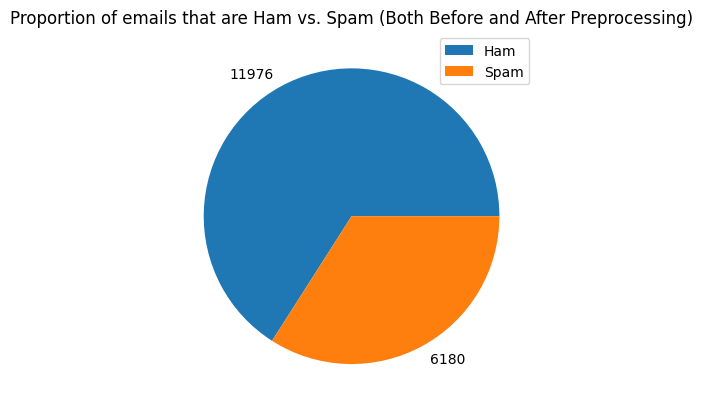

In [196]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

#Pie chart for spam and ham emails
with open('data/alldatacounts.txt', 'r') as f:
    alldatacounts = [line.strip() for line in f]
alldatacounts = np.array([int(alldatacounts[i]) for i in range(len(alldatacounts))])
plt.pie(alldatacounts,labels = alldatacounts)
plt.title("Proportion of emails that are Ham vs. Spam (Both Before and After Preprocessing)")
plt.legend(["Ham","Spam"])

#WordCloud Moment

#Spam words and counts
spam_emails = sparse_dat[sparse_dat[:,0].nonzero()[0],:]
spam_sum_vec = spam_emails.sum(axis=0)
spam_sum_vec = np.array(spam_sum_vec)
spam_sum_vec = (spam_sum_vec.flatten())[1:]
spam_sum_vec = spam_sum_vec[spam_sum_vec!=0]
column_names = np.array(column_names)
spam_column_names = (column_names[spam_sum_vec.nonzero()[0]])[2:]
spam_column_names = [spam_column_names[i].decode('utf-8',errors='ignore') for i in range(len(spam_column_names))]
spam_word_dict = {spam_column_names[i]: spam_sum_vec[i] for i in range(len(spam_column_names))}

#Ham words and counts
zero_indices = [i for i in range(18156)]
dif1 = np.setdiff1d(zero_indices, non_zero_indices)
dif2 = np.setdiff1d(non_zero_indices, zero_indices)
zero_indices = np.concatenate((dif1, dif2))
ham_emails = sparse_dat[zero_indices,:]
ham_sum_vec = ham_emails.sum(axis=0)
ham_sum_vec = np.array(ham_sum_vec)
ham_sum_vec = (ham_sum_vec.flatten())[1:]
ham_sum_vec = ham_sum_vec[ham_sum_vec!=0]
column_names = np.array(column_names)
ham_column_names = (column_names[ham_sum_vec.nonzero()[0]])[2:]
ham_column_names = [ham_column_names[i].decode('utf-8',errors='ignore') for i in range(len(ham_column_names))]
ham_word_dict = {ham_column_names[i]: ham_sum_vec[i] for i in range(len(ham_column_names))}




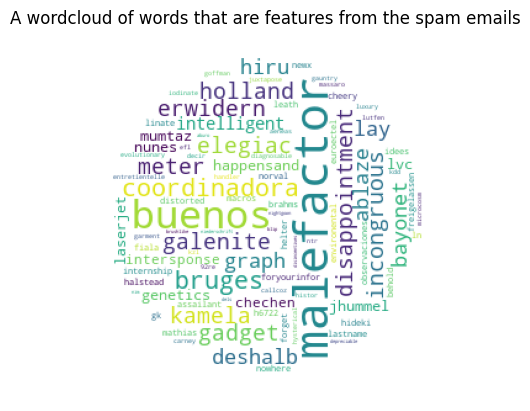

In [188]:
#WordCloud I Guess (Spam)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
spam_wc = WordCloud(background_color="white", max_words=None,mask=mask)
spam_wc.generate_from_frequencies(spam_word_dict)
plt.imshow(spam_wc)
plt.title("A wordcloud of words that are features from the spam emails")
plt.axis('off')
plt.show()

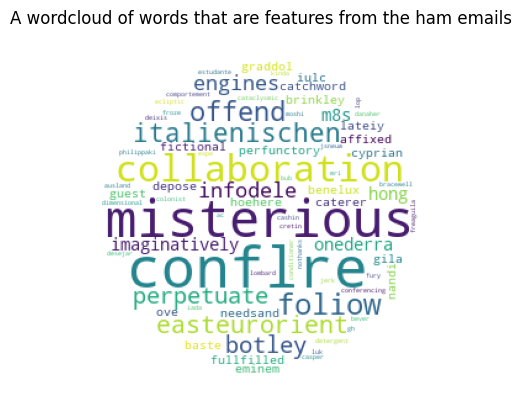

In [187]:
#WordCloud I Guess (Ham)
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
spam_wc = WordCloud(background_color="white", max_words=None,mask=mask)
spam_wc.generate_from_frequencies(ham_word_dict)
plt.imshow(spam_wc)
plt.title("A wordcloud of words that are features from the ham emails")
plt.axis('off')
plt.show()

# Models and Evaluation

## Experimental Setup

### Evaluation metrics

Q. How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

A. We analyzed multiple different metrics when determining how successful our algorithm was. Firstly, and perhaps most logically, we evaluated the overall accuracy of our AdaBoost algorithm. This is simply calculated as the ottal number of correct classifications relative to the entire dataset. This is the standard benchmark metric for classification algorithms. We also calculated the F1 score, but realize this is less important as the dataset is not class balanced. A final metric we used to evaluate our email classifier was the amount of "type 1" and "type 2" errors that the classifier makes. To clarify, a "type 1" error is when a legitimate email is classified as spam (as if our null hypothesis was that the email is legitimate) and a "type 2" error is when a spam email. Since we prioritize safety in our implementation, we value decreasing type 2 errors highly, even at the cost of some more type 1 errors.


### Custom loss function

Q. What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

A. Our custom loss function is pasted below. Rather than assign a uniform loss of 1 for any misclassification, we implemented the ability to adjust the type 2 errors (classifying ham when actually spam) by a multiplicative factor. So, for example, if our ith weak learner misclassified the jth email as ham when the true label was spam, the jth entry of the weak learner's error vector would receive an error value of pen_factor. For a large penalty (>1) this results in the alpha value being smaller if there were many type 2 errors. As a result, the weights for the particular sample will be higher! Hence, the algorithm will focus more attention on this misclassified emails and the type 2 errors. [adaboost for dummies](https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf)

We did try a couple other loss functions, but they sucked. One of our preliminary ideas was to weight the alpha itself as a function of the proportion of type 2 errors, but we found this to be ineffective and less interpretable.

Furthermore, we implemented our own Adaboost algorithm to leverage this custom loss function. [github](https://github.com/JonathanYe3/ML_duh_guyz/blob/main/AdaBoostWeakClassic.py)

In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

def compute_error(y, y_pred, w_i, type2penalty, pen_factor):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation

    
    Note that all arrays should be the same length. Convert sparse array to regular array before calling
    '''
    if type2penalty:
        error = (sum(w_i * (t2_pred_err_vec(y, y_pred, pen_factor)).astype(float)))/sum(w_i)
    else:
        error = (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

    return error
def t2_pred_err_vec(y,y_pred, pen_factor):
    pred_err_vec = ((y_pred==-1) & (y==1))* pen_factor
    better_err_vec = ((y_pred==1)) & (y==-1)
    pred_err_vec = pred_err_vec+better_err_vec
    if np.isnan(pred_err_vec).any(): print("WAHHHHH NAN")
    return pred_err_vec


### Train/Test split

Q. How did you split your data into train and test sets? Why?

A. We stratified by the y labels - so that we had similar proportion of spam in both train + test. This is common practice and helps prevent the test set from being biased towards the majority class (ham) and ensures a fair evaluation of our model's ability to detect spam emails.

In [ ]:
# Train test split

# Use train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=True, stratify=labels.toarray().ravel())

y_train_flat = y_train.copy().toarray().ravel()
#y_train_flat[y_train_flat == -1] = 0 See if you have to run this line if anything sus

y_test_flat = y_test.copy().toarray().ravel()
# y_test_flat[y_test_flat == -1] = 0 Same here


## Baselines

Q. What baselines did you compare against? Why are these reasonable?

A. We compared our custom Adaboost model with scikit-learn's Support Vector Machine (SVM) and Random Forest classifiers, both with default parameters. These were reasonable choices for baselines because SVMs and Random Forests are popular and well-performing algorithms for text classification tasks like spam filtering. They achieve good accuracy and are relatively easy to implement, making them strong benchmarks. Additionally, unlike some complex models, SVMs and Random Forests offer some level of interpretability. This allows us to understand the factors influencing their spam/ham classifications, which can be valuable for improving our Adaboost model. Finally, By using default parameters, we establish a baseline performance without the influence of extensive tuning. This lets us compare our Adaboost's performance with these established algorithms to see if our custom loss function focusing on type 2 errors leads to any improvements.


Q. Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

A. Yes, we looked at related work on spam classification to contextualize how other methods or baselines have performed on this task. In addition to SVMs and Random Forests, related work often explores other boosting algorithms like XGBoost or GBDT. Additionally, some studies investigate Naive Bayes classifiers, which are known for their simplicity and efficiency in text classification. Even simpler rule-based approaches based on keyword filtering might be examined as baselines. The performance of these related methods varies depending on the specific approach and dataset used. One goal was to compare their achieved accuracy with our Adaboost model and the chosen baselines (SVM and Random Forest). More importantly, however, we wanted to see if our type 2 penalty was effective, which is our novel contribution to the email classification problem.


In [ ]:
# Helper function to calculate error types

def errors(y, y_pred):
        """
        Calculate the proportion of type 2 errors - when the true label is 1 - spam, and the predicted label is 0 - ham

        Args:
        y: true labels
        y_pred: predicted labels
        """
        n = y.shape[0]
        y[y == -1] = 0
        type2errors = ((y == 1) & (y_pred == 0)).sum().item()
        type1errors = ((y == 0) & (y_pred == 1)).sum().item()
        correct = (y_pred == y).sum().item()
        #print(np.unique(y_pred), np.unique(y))
        return type2errors, type1errors, correct

In [ ]:
# SVM

from sklearn import svm
svm_example = svm.SVC(probability = True)
svm_example.fit(X_train, y_train_flat)


In [ ]:
# Train metrics
predictions = svm_example.predict(X_train)
type2, type1, correct = errors(y_train_flat, predictions)
f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)

svm_train_metrics = ["svm",type2, type1, correct/len(predictions), f1]

# For ROC
scores = svm_example.predict_proba(X_test)
svm_fpr, svm_tpr, thresholds  = metrics.roc_curve(y_test_flat, scores[:,1])

# type 2 error stuff TEST
predictions = svm_example.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

svm_test_metrics = ["svm", type2, type1, correct/len(predictions), f1]

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train_flat)

In [ ]:
# Train metrics
predictions = rf.predict(X_train)
type2, type1, correct = errors(y_train_flat, predictions)
f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)

rf_train_metrics = ["rf",type2, type1, correct/len(predictions), f1]

# For ROC
scores = rf.predict_proba(X_test)
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test_flat, scores[:,1])

# type 2 error stuff TEST
predictions = rf.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

rf_test_metrics = ["rf", type2, type1, correct/len(predictions), f1]

## Methods

Q. What methods did you choose? Why did you choose them?

A. As mentioned above, we chose to manually implement Adaboost so that we could leverage a custom loss function that penalized type 2 errors more heavily. Beyond this, we chose Adaboost in general due to its robustness against overfitting, relative interpretability, and the fact that most research into this task did not involve Adaboost. We chose to sklearn's decision trees as our weak learners, because adaboost typically boosts decision trees of limited depth.

Q. How did you train these methods, and how did you evaluate them? Why?

A. 

Q. Which methods were easy/difficult to implement and train? Why?

A. Implementating Adaboost itself was decently hard. Big obstacle was getting the weak learners to be unique. Maybe also talk about boosting RF? [github](https://github.com/JonathanYe3/ML_duh_guyz/blob/main/AdaBoostWeakClassic.py)

Our custom loss function was easy to implement, as we could simply adapt the current error calculation.


Q. For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

A. First, we ran a grid search to find the best set of parameters for our goal - to reduce type 2 error (actual spam email classified as ham) while not sacrificing too much accuracy. Details are in the grid search section, but we evaluated the rounds of boosting, max depth of our weak learners, and the penalty factor.

## Grid Search

EVAN WAHHHH - add details (explain validation set, cross fold, yada yada) and most importantly paste that figure in here

In [ ]:
# do something here

## Training the model

Using our choise of parameters from grid search:

penalty factor = 2

decision tree depth = 5 - for the sake of speed

number of boosting rounds = 200 - for the sake of speed


In [ ]:
# Code for training models, or link to your Git repository
%run AdaBoostWeakClassic.py

aboost_final = AdaBoostWeakClassic(rounds = 200, type2penalty=True, pen_factor = 2.0, maxDTdepth=5)
aboost_final.fit(X_train, y_train_flat)

In [ ]:
# Training metrics
predictions = aboost_final.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Final Model (without penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# y_train_flat = y_train.copy().toarray().ravel()
# y_train_flat[y_train_flat == -1] = 0

f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)
print(f'F1 score: {f1}')

# aboost_train_metrics = [type2, type1, correct/len(predictions), f1]

In [ ]:
aboost_train_metrics = ["adaboost",type2, type1, correct/len(predictions), f1]

In [ ]:
# Test Metrics
# For ROC
probits = aboost_final.predict_probs(X_test)
ada_fin_fpr, ada_fin_tpr, thresholds  = metrics.roc_curve(y_test_flat, probits)

predictions = aboost_final.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

# aboost_test_metrics = [type2, type1, correct/len(predictions), f1]

In [ ]:
aboost_test_metrics = ["adaboost",type2, type1, correct/len(predictions), f1]

In [ ]:
# Show plots of how these models performed during training. FUCK
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.
plt.plot(range(2, 201, 10), aboost_final.accuracies)
plt.xlabel("Boosting rounds")
plt.ylabel("Accuracy")
plt.title("Boosting rounds vs. Accuracy")
plt.show()
plt.plot(range(2, 201, 10), aboost_final.type2errors)
plt.xlabel("Boosting rounds")
plt.ylabel("Number of type 2 errors")
plt.title("Boosting rounds vs. Type 2 Errors")
plt.show()

## Results

Show tables comparing your methods to the baselines.

Q. What about these results surprised you? Why?

A. 

Q. Did your models over- or under-fit? How can you tell? What did you do to address these issues?

A. 

Q. What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

A. 

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

### ROC Curve Comparison


In [ ]:
plt.plot(svm_fpr, svm_tpr, marker='.', label='Default SVM')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Default Random Forest')
plt.plot(ada_fin_fpr, ada_fin_tpr, marker='.', label='Custom Adaboost')


plt.title("ROC comparison")
plt.legend()

### Table

In [ ]:
from prettytable import PrettyTable

train_table = PrettyTable(["train method","type 2", "type 1", "accuracy", "F1"])
train_table.add_row(svm_train_metrics)
train_table.add_row(rf_train_metrics)
train_table.add_row(aboost_train_metrics)
train_table._rows[-1] = [f"\033[1m{cell}\033[0m" for cell in train_table._rows[-1]]
print(train_table)

test_table = PrettyTable(["test method","type 2", "type 1", "accuracy", "F1"])
test_table.add_row(svm_test_metrics)
test_table.add_row(rf_test_metrics)
test_table.add_row(aboost_test_metrics)
test_table._rows[-1] = [f"\033[1m{cell}\033[0m" for cell in test_table._rows[-1]]
print(test_table)

In [45]:
# Load your data and print 2-3 examples
df1 = pd.read_csv("data/spam.csv", usecols=[0,1])
print(df1.iloc[0:3,:])


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...


# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

Q. What concepts from lecture/breakout were most relevant to your project? How so?

A. The Adaboost lecture

Q. What aspects of your project did you find most surprising?

A. The fact that it outperforms sklearn default SVM, and is not horribly inefficient

Q. What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

A. 

Q. What was the most helpful feedback you received during your presentation? Why?

A. We got no feedback

Q. If you had two more weeks to work on this project, what would you do next? Why?

A. Probably nothing